In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [59]:
root='.'
root2='/Genomics/pritykinlab/zzhao/metabolic_analysis'
filename = f'{root}/data/th_data/GSE162300_DFMO_RNA_TPMs.tsv'
reaction_meta_file = f'{root2}/Compass/compass/Resources/Recon2_export/rxn_md.csv'
reaction_output_file = f'{root}/data/compass_scrna/github_data/reactions.tsv'
scrna_metadata_file = f'{root}/data/compass_scrna/github_data/cell_metadata.csv'
out_dir = f'{root}/compass_comparison/'
hypergeom_dir = f'{out_dir}scrna/'

In [11]:
reaction_metadata = pd.read_csv(reaction_meta_file, index_col = 0)
reaction_penalties = pd.read_csv(reaction_output_file, sep='\t', index_col=0)
reaction_metadata

,rxn_name_long,subsystem,ind_in_original_recon,rxn_EC_number,genes_associated_with_rxn,rxn_formula,rxn_confidence
rxn_code_nodirection,,,,,,,
10FTHF5GLUtl,"5-glutamyl-10FTHF transport, lysosomal","Transport, lysosomal",1,NaN,NaN,1.00 * 10-formyltetrahydrofolate-[Glu](5) [c] ...,2.0
10FTHF5GLUtm,"5-glutamyl-10FTHF transport, mitochondrial","Transport, mitochondrial",2,NaN,NaN,1.00 * 10-formyltetrahydrofolate-[Glu](5) [m] ...,2.0
10FTHF6GLUtl,"6-glutamyl-10FTHF transport, lysosomal","Transport, lysosomal",3,NaN,NaN,1.00 * 10-formyltetrahydrofolate-[Glu](6) [c] ...,2.0
10FTHF6GLUtm,"6-glutamyl-10FTHF transport, mitochondrial","Transport, mitochondrial",4,NaN,NaN,1.00 * 10-formyltetrahydrofolate-[Glu](6) [m] ...,2.0
10FTHF7GLUtl,"7-glutamyl-10FTHF transport, lysosomal","Transport, lysosomal",5,NaN,NaN,1.00 * 10-formyltetrahydrofolate-[Glu](7) [c] ...,2.0
...,...,...,...,...,...,...,...
MAL_Lte,Transport of L-malate,"Transport, extracellular",7436,NaN,NaN,1.00 * (S)-malate(2-) [e] --> 1.00 * (S)-malat...,NaN
OROTGLUt,OROTGLUt,"Transport, extracellular",7437,NaN,SLC22A7,1.00 * L-glutamate(1-) [c] + 1.00 * Orotate [e...,NaN
PNTOte,Transport of (R)-Pantothenate,"Transport, extracellular",7438,NaN,NaN,1.00 * (R)-Pantothenate [e] --> 1.00 * (R)-Pan...,NaN


In [12]:
#This function is repeated here for clarity
def get_reaction_consistencies(compass_reaction_penalties, min_range=1e-3):
    """
        Converts the raw penalties outputs of compass into scores per reactions where higher numbers indicate more activity
    """
    df = -np.log(compass_reaction_penalties + 1)
    df = df[df.max(axis=1) - df.min(axis=1) >= min_range]
    df = df - df.min().min()
    return df

In [13]:
reaction_consistencies = get_reaction_consistencies(reaction_penalties)

In [14]:
from compass_analysis import cohens_d, wilcoxon_test, get_reaction_consistencies, get_metareactions, labeled_reactions, amino_acid_metab


In [15]:
reaction_consistencies

,SRR2921282,SRR2921283,SRR2921284,SRR2921285,SRR2921286,SRR2921287,SRR2921288,SRR2921289,SRR2921290,SRR2921291,...,SRR2921703,SRR2921704,SRR2921705,SRR2921706,SRR2921707,SRR2921708,SRR2921709,SRR2921710,SRR2921711,SRR2921712
10FTHF5GLUtl_pos,3.560098,3.579258,3.485923,3.584638,3.515186,3.558645,3.558489,3.543815,3.543955,3.516090,...,3.519169,3.529113,3.505519,3.547540,3.556900,3.541081,3.550715,3.587909,3.556162,3.506701
10FTHF5GLUtm_pos,3.234027,3.244194,3.279274,3.254046,3.203246,3.230456,3.323853,3.323872,3.311300,3.200736,...,3.296751,3.286697,3.249583,3.287074,3.264088,3.261074,3.216091,3.343650,3.325867,3.192499
10FTHF6GLUtl_pos,3.409903,3.436089,3.310607,3.444044,3.348049,3.408090,3.408453,3.395481,3.397799,3.349607,...,3.355255,3.372460,3.334797,3.392539,3.405190,3.383008,3.396777,3.457350,3.407172,3.337523
10FTHF6GLUtm_pos,3.207974,3.226635,3.221804,3.237842,3.171089,3.201245,3.285225,3.283461,3.263414,3.157963,...,3.242711,3.238099,3.203860,3.253589,3.235269,3.222103,3.183784,3.324754,3.283187,3.143835
10FTHF7GLUtl_pos,3.321002,3.350895,3.235614,3.360219,3.250377,3.318999,3.343339,3.332772,3.330132,3.252261,...,3.285036,3.306437,3.243860,3.316514,3.326009,3.311316,3.305916,3.401467,3.340940,3.238800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sink_decdicoa(c)_neg,1.985330,2.000964,1.941432,2.027745,1.910153,1.986186,1.996023,2.003792,1.948791,1.982319,...,2.063456,2.011850,1.990337,2.041585,2.062957,1.998108,2.030832,2.011791,1.969472,2.014824
sink_octdececoa(c)_neg,1.700189,1.700909,1.689598,1.741643,1.617176,1.672456,1.663766,1.745393,1.623148,1.670114,...,1.757744,1.667850,1.721753,1.714890,1.762804,1.724083,1.655184,1.684556,1.621820,1.754615
sink_pre_prot(r)_neg,7.563360,7.646562,7.633055,7.614586,7.544816,7.629731,7.588375,7.518963,7.542433,7.635217,...,7.618614,7.633269,7.537016,7.586845,7.598115,7.576199,7.690232,7.571615,7.576723,7.546652
sink_tetdec2coa(c)_neg,1.985330,2.000964,1.941432,2.027745,1.910153,1.986186,1.996023,2.003792,1.948791,1.982319,...,2.063456,2.011850,1.990337,2.041585,2.062957,1.998108,2.030832,2.011791,1.969472,2.014824


In [38]:
cell_metadata = pd.read_csv(scrna_metadata_file, sep=',', index_col=0)
cell_metadata

,cell_type,MD_SRX,NREADS,NALIGNED,RALIGN
cell_id,,,,,
SRR2921282,Th17p,SRX1435506,637389,396663,62.2325
SRR2921283,Th17p,SRX1435507,1074300,732092,68.1459
SRR2921284,Th17p,SRX1435508,1480810,1085800,73.3252
SRR2921285,Th17p,SRX1435509,1374340,982010,71.4531
SRR2921286,Th17p,SRX1435510,1243850,921003,74.0444
...,...,...,...,...,...
SRR2921708,Th17n,SRX1435924,2500130,1701980,68.0755
SRR2921709,Th17n,SRX1435925,3024280,2098810,69.3988
SRR2921710,Th17n,SRX1435926,2853240,1622680,56.8715


In [39]:
Th17p_cells = cell_metadata.index[cell_metadata['cell_type'] == 'Th17p']
Th17n_cells = cell_metadata.index[cell_metadata['cell_type'] == 'Th17n']

In [40]:
# Th17p_Vehicle = scrna_metadata[scrna_metadata['cell_type'] == 'Th17p'].index
# print(Th17p_Vehicle)
# Th17n_Vehicle = scrna_metadata[scrna_metadata['cell_type'] == 'Th17n'].index
# print(Th17n_Vehicle)

In [41]:
wilcox_results = wilcoxon_test(reaction_consistencies, Th17p_cells, Th17n_cells)
wilcox_results['metadata_r_id'] = ""
for r in wilcox_results.index:
    if r in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r
    elif r[:-4] in reaction_metadata.index:
        wilcox_results.loc[r, 'metadata_r_id'] = r[:-4]
    else:
        print("Should not occur")

In [42]:
wilcox_results

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id
10FTHF5GLUtl_pos,12986.0,0.000480,0.402616,0.002237,10FTHF5GLUtl
10FTHF5GLUtm_pos,10555.0,0.932976,0.028854,0.950273,10FTHF5GLUtm
10FTHF6GLUtl_pos,12889.0,0.000792,0.374953,0.003426,10FTHF6GLUtl
10FTHF6GLUtm_pos,10885.0,0.584616,0.082620,0.711158,10FTHF6GLUtm
10FTHF7GLUtl_pos,12542.0,0.004115,0.322142,0.013098,10FTHF7GLUtl
...,...,...,...,...,...
sink_decdicoa(c)_neg,9015.0,0.038165,-0.196656,0.077116,sink_decdicoa(c)
sink_octdececoa(c)_neg,10163.0,0.642680,-0.062833,0.733384,sink_octdececoa(c)
sink_pre_prot(r)_neg,13242.0,0.000118,0.465730,0.000681,sink_pre_prot(r)
sink_tetdec2coa(c)_neg,9015.0,0.038165,-0.196656,0.077116,sink_tetdec2coa(c)


In [43]:
W = wilcox_results.merge(reaction_metadata, how='left',
                         left_on='metadata_r_id', right_index=True, validate='m:1')
# W = W[W['rxn_confidence'].isin([0,4])]
W = W[W['rxn_confidence'].isin([1,2,3,4])]
W = W[~W['rxn_EC_number'].isna()]
# new
W = W[~W['genes_associated_with_rxn'].isna()]
W.loc[(W['rxn_formula'].map(lambda x: '[m]' not in x)) & (W['subsystem'] == "Citric acid cycle"), 'subsystem'] = 'Other'

In [44]:
wilcox_results.loc[['r0281_pos']]

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id
r0281_pos,9269.0,0.085969,-0.221507,0.153082,r0281


In [46]:
reaction_metadata.loc['r0281']['rxn_formula']

'1.00 * Water [e] + 1.00 * O2 [e] + 1.00 * Putrescine [e] --> 1.00 * Ammonium [e] + 1.00 * Hydrogen peroxide [e] + 1.00 * 4-Aminobutanal [e]\nAOC1'

In [29]:
W[W['adjusted_pval']<0.05].sort_values(by=['adjusted_pval'])

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,rxn_name_long,subsystem,ind_in_original_recon,rxn_EC_number,genes_associated_with_rxn,rxn_formula,rxn_confidence
NADNe_pos,69.0,3.297642e-52,-2.184415,3.002268e-49,NADNe,"NAD nucleosidase,extracellular",NAD metabolism,2671,3.2.2.5,CD38,1.00 * Water [e] + 1.00 * Nicotinamide adenine...,4.0
NADPNe_pos,69.0,3.297642e-52,-2.184415,3.002268e-49,NADPNe,"NADP nucleosidase,extracellular",NAD metabolism,2675,3.2.2.6,CD38,1.00 * Water [e] + 1.00 * Nicotinamide adenine...,4.0
FACOAL1821_neg,3491.0,9.612729e-23,-1.211433,3.603642e-20,FACOAL1821,fatty-acid--CoA ligase,Fatty acid oxidation,1627,6.2.1.3,ACSBG2; ACSL1; ACSL3; ACSL4,1.00 * ATP [c] + 1.00 * Coenzyme A [c] + 1.00 ...,4.0
RNDR1_pos,3878.0,1.801330e-20,-0.406287,4.415337e-18,RNDR1,ribonucleoside-diphosphate reductase (ADP),Nucleotide interconversion,3208,1.7.14.1,RRM1; RRM2; RRM2B,1.00 * ADP [c] + 1.00 * Reduced thioredoxin [c...,2.0
RNDR4_pos,3936.0,3.848723e-20,-0.369379,7.432701e-18,RNDR4,ribonucleoside-diphosphate reductase (UDP),Nucleotide interconversion,3211,1.7.14.1,RRM1; RRM2; RRM2B,1.00 * UDP [c] + 1.00 * Reduced thioredoxin [c...,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
OIVD2m_pos,12185.0,1.784417e-02,0.280616,4.466650e-02,OIVD2m,2-oxoisovalerate dehydrogenase (acylating; 3-m...,"Valine, leucine, and isoleucine metabolism",2831,1.8.1.4,BCKDHA; BCKDHB; DBT; DLD,1.00 * Coenzyme A [m] + 1.00 * Nicotinamide ad...,4.0
HIBDm_pos,12185.0,1.784417e-02,0.280616,4.466650e-02,HIBDm,"3-hydroxyisobutyrate dehydrogenase, mitochondrial","Valine, leucine, and isoleucine metabolism",2236,1.1.1.31,HIBADH,1.00 * Nicotinamide adenine dinucleotide [m] +...,4.0
2HBO_pos,12183.0,1.797987e-02,0.405221,4.497084e-02,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,Propanoate metabolism,41,1.1.1.27,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,4.0
NBAHH_ir_pos,12165.0,1.924236e-02,0.247134,4.723865e-02,NBAHH_ir,Nalpha-(beta-alanyl)-L-histidine hydrolase IR,beta-Alanine metabolism,2694,3.4.13.3,CNDP1; CNDP2,1.00 * Water [c] + 1.00 * carnosine [c] --> 1....,1.0


In [30]:
W[W['adjusted_pval']<0.05]['subsystem'].value_counts()

Nucleotide interconversion                           57
Fatty acid oxidation                                 40
Sphingolipid metabolism                              40
Tyrosine metabolism                                  21
Blood group synthesis                                20
Folate metabolism                                    20
Pyrimidine catabolism                                18
Cholesterol metabolism                               17
Valine, leucine, and isoleucine metabolism           16
Purine catabolism                                    12
Bile acid synthesis                                  11
Glycerophospholipid metabolism                       11
Arginine and Proline Metabolism                      10
Aminosugar metabolism                                10
Pentose phosphate pathway                            10
Pyruvate metabolism                                   9
Inositol phosphate metabolism                         9
Urea cycle                                      

In [47]:
gene_set_all = []
for gene_list in W[W['adjusted_pval']<0.05]['genes_associated_with_rxn'].values:
    if type(gene_list) is not float:
        gene_set_all.extend(gene_list.split('; '))
print(len(gene_set_all))

868


In [48]:
from collections import Counter
Counter(gene_set_all).most_common()

[('ACSL1', 20),
 ('PNP2', 15),
 ('GM20390', 13),
 ('NME2', 13),
 ('FUT9', 11),
 ('NT5C', 11),
 ('NT5C3', 10),
 ('NT5E', 10),
 ('CRAT', 9),
 ('FPGS', 9),
 ('SUCLG1', 8),
 ('NT5C1A', 8),
 ('NT5C1B', 8),
 ('NT5C2', 8),
 ('ST6GALNAC2', 8),
 ('ALDH3B1', 7),
 ('FUT1', 7),
 ('NME6', 7),
 ('ALDH3A1', 6),
 ('ALDH3B3', 6),
 ('AKR7A5', 6),
 ('EHHADH', 6),
 ('ST8SIA5', 6),
 ('ADH1', 5),
 ('ADH4', 5),
 ('ADH5', 5),
 ('ADH6A', 5),
 ('ADH7', 5),
 ('ADHFE1', 5),
 ('ALDH1A3', 5),
 ('ACAA1B', 5),
 ('ACOX1', 5),
 ('HSD17B4', 5),
 ('BCAT2', 5),
 ('MTHFD2', 5),
 ('UGT1A8', 5),
 ('LDHA', 4),
 ('LDHAL6B', 4),
 ('LDHB', 4),
 ('LDHC', 4),
 ('GOT2', 4),
 ('ATIC', 4),
 ('ZADH2', 4),
 ('AKR1A1', 4),
 ('AKR1B3', 4),
 ('B3GALT4', 4),
 ('AICDA', 4),
 ('DCK', 4),
 ('SLC27A2', 4),
 ('MTHFD1', 4),
 ('CTSA', 4),
 ('GALNS', 4),
 ('GLB1', 4),
 ('NEU1', 4),
 ('B4GALNT1', 4),
 ('SUCLG2', 4),
 ('SUCLA2', 4),
 ('NME3', 4),
 ('NME7', 4),
 ('NME4', 4),
 ('RRM1', 4),
 ('RRM2', 4),
 ('RRM2B', 4),
 ('UEVLD', 3),
 ('DDC', 3),
 ('AL

In [49]:
W['subsystem'].value_counts()

Nucleotide interconversion     174
Fatty acid oxidation           145
Keratan sulfate degradation     59
Sphingolipid metabolism         44
Tyrosine metabolism             41
                              ... 
Ubiquinone synthesis             1
Vitamin C metabolism             1
CoA synthesis                    1
O-glycan synthesis               1
Thiamine metabolism              1
Name: subsystem, Length: 75, dtype: int64

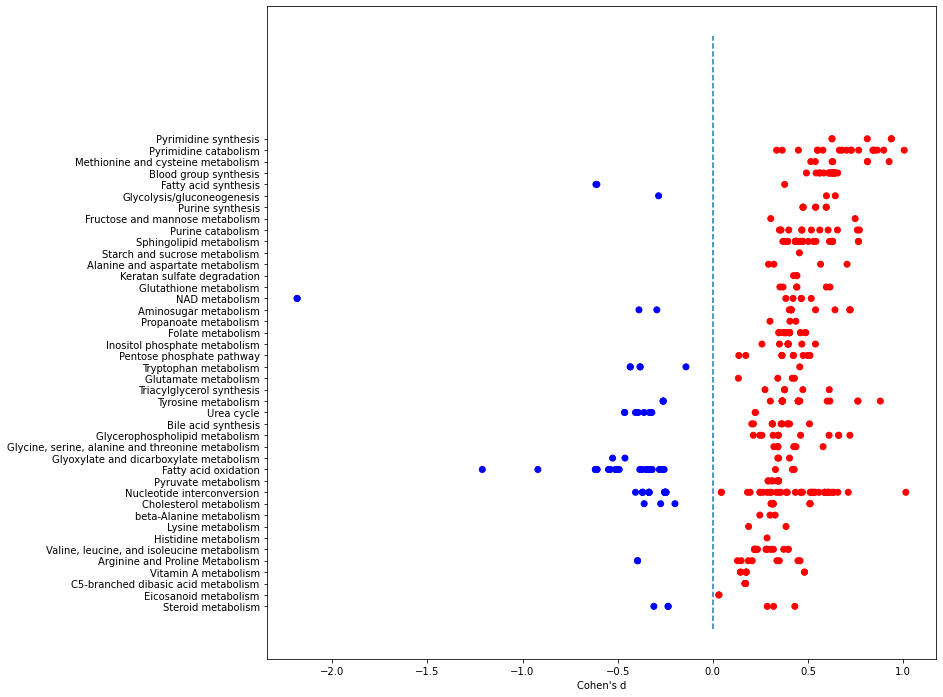

In [52]:
# only significant
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]
data = data[data['adjusted_pval'] < 0.05]
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.05].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')
alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
axs.set_xlabel("Cohen's d")
axs.vlines(x=0, ymin=-2, ymax=50, linestyles='--')

(-0.8, 0.8)

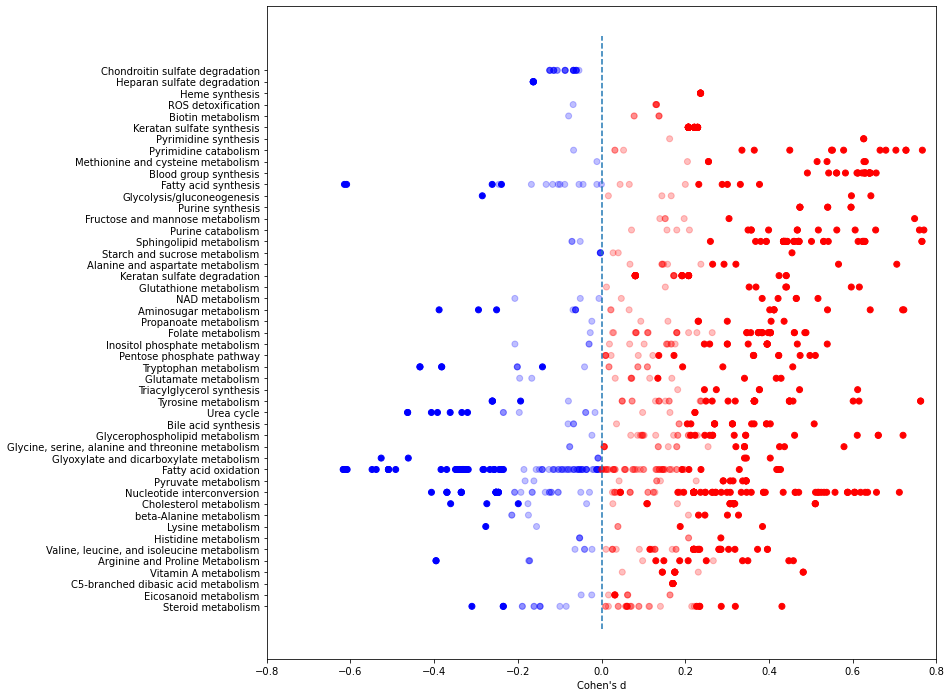

In [53]:
# all p values plotted
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.05].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')
alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
axs.set_xlabel("Cohen's d")
axs.vlines(x=0, ymin=-2, ymax=50, linestyles='--')
axs.set_xlim(-0.8,.8)

In [54]:
print(data[data['adjusted_pval'] < 0.05].groupby('subsystem')['cohens_d'].quantile([.25]))

subsystem                                              
Alanine and aspartate metabolism                   0.25    0.314044
Aminosugar metabolism                              0.25    0.404578
Arginine and Proline Metabolism                    0.25    0.134627
Bile acid synthesis                                0.25    0.312911
Blood group synthesis                              0.25    0.603557
C5-branched dibasic acid metabolism                0.25    0.170517
Cholesterol metabolism                             0.25    0.307112
Eicosanoid metabolism                              0.25    0.031949
Fatty acid oxidation                               0.25   -0.516402
Fatty acid synthesis                               0.25   -0.611642
Folate metabolism                                  0.25    0.374977
Fructose and mannose metabolism                    0.25    0.415597
Glutamate metabolism                               0.25    0.289909
Glutathione metabolism                             0.25    0

# compare results to hypergeom test

In [47]:
#data.to_csv(out_dir + 'compass_results_data.csv')

In [55]:
# data = pd.read_csv(out_dir + 'compass_results_data.csv', index_col = 0)
data

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,rxn_name_long,subsystem,ind_in_original_recon,rxn_EC_number,genes_associated_with_rxn,rxn_formula,rxn_confidence
13DAMPPOX_pos,9130.0,5.589046e-02,-0.214296,1.047309e-01,13DAMPPOX,"1,3-Diaminopropane:oxygen oxidoreductase (deam...",beta-Alanine metabolism,13,1.4.3.6,AOC1; AOC2; AOC3,1.00 * trimethylenediaminium [c] + 1.00 * Wate...,1.0
2HBO_neg,10600.0,8.829930e-01,0.093878,9.156059e-01,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,Propanoate metabolism,41,1.1.1.27,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,4.0
2HBO_pos,12183.0,1.797987e-02,0.405221,4.497084e-02,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,Propanoate metabolism,41,1.1.1.27,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,4.0
2OXOADOXm_pos,9464.0,1.488154e-01,-0.155247,2.446223e-01,2OXOADOXm,2-Oxoadipate:lipoamde 2-oxidoreductase(decarbo...,Lysine metabolism,45,2.3.1.61,DLD; DLST; OGDH; PDHX,1.00 * 2-oxoadipate(2-) [m] + 1.00 * Coenzyme ...,2.0
34DHOXPEGOX_pos,14828.0,1.251748e-09,0.762535,5.081141e-08,34DHOXPEGOX,"3,4-Dihydroxyphenylethyleneglycol:NAD+ oxidore...",Tyrosine metabolism,47,1.1.1.1,ADH1; ADH4; ADH5; ADH6A; ADH7; ADHFE1,1.00 * proton [c] + 1.00 * Nicotinamide adenin...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
XAO2x_pos,11698.0,9.175370e-02,0.179876,1.621143e-01,XAO2x,xanthine oxidase,Purine catabolism,3711,1.1.1.204,XDH,1.00 * O2 [x] + 1.00 * Water [x] + 1.00 * Hypo...,4.0
XAOx_pos,12678.0,2.214382e-03,0.350214,8.009227e-03,XAOx,"xanthine oxidase,peroxisomal",Purine catabolism,3712,1.1.1.204,XDH,1.00 * O2 [x] + 1.00 * Water [x] + 1.00 * Xant...,4.0
XYLK_pos,11561.0,1.351263e-01,0.122613,2.268598e-01,XYLK,xylulokinase,Pentose phosphate pathway,3730,2.7.1.17,XYLB,1.00 * ATP [c] + 1.00 * D-xylulose [c] --> 1.0...,4.0
XYLUR_neg,13525.0,2.165705e-05,0.136831,1.584620e-04,XYLUR,xylulose reductase,Pentose phosphate pathway,3736,1.1.1.10,DCXR,1.00 * proton [c] + 1.00 * Nicotinamide adenin...,4.0


In [56]:
sig_data = data[data['adjusted_pval'] < 0.05]
sig_data

,wilcox_stat,wilcox_pval,cohens_d,adjusted_pval,metadata_r_id,rxn_name_long,subsystem,ind_in_original_recon,rxn_EC_number,genes_associated_with_rxn,rxn_formula,rxn_confidence
2HBO_pos,12183.0,1.797987e-02,0.405221,4.497084e-02,2HBO,2-Hydroxybutyrate:NAD+ oxidoreductase,Propanoate metabolism,41,1.1.1.27,LDHA; LDHAL6B; LDHB; LDHC; UEVLD,1.00 * 2-Hydroxybutyrate [c] + 1.00 * Nicotina...,4.0
34DHOXPEGOX_pos,14828.0,1.251748e-09,0.762535,5.081141e-08,34DHOXPEGOX,"3,4-Dihydroxyphenylethyleneglycol:NAD+ oxidore...",Tyrosine metabolism,47,1.1.1.1,ADH1; ADH4; ADH5; ADH6A; ADH7; ADHFE1,1.00 * proton [c] + 1.00 * Nicotinamide adenin...,4.0
34DHPLACOX_NADP__neg,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHPLACOX_NADP_,"3,4-Dihydroxyphenylacetaldehyde:NADP+ oxidored...",Tyrosine metabolism,52,1.2.1.5,ALDH3A1; ALDH3B1; ALDH3B3,1.00 * Water [c] + 1.00 * Nicotinamide adenine...,4.0
34DHPLACOX_pos,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHPLACOX,"3,4-Dihydroxyphenylacetaldehyde:NAD+ oxidoredu...",Tyrosine metabolism,51,1.2.1.5,ALDH1A3; ALDH3A1; ALDH3B1; ALDH3B3,1.00 * Water [c] + 1.00 * Nicotinamide adenine...,4.0
34DHXMANDACOX_NADP__neg,12799.0,1.240216e-03,0.365011,4.936849e-03,34DHXMANDACOX_NADP_,"3,4-Dihydroxymandelaldehyde:NADP+ oxidoreductase",Tyrosine metabolism,54,1.2.1.5,ALDH3B1; ALDH3B3,1.00 * Water [c] + 1.00 * Nicotinamide adenine...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
VLCSr_pos,12916.0,6.901503e-04,0.403316,3.024985e-03,VLCSr,Very-long-chain-fatty-acid-CoA ligase,Bile acid synthesis,3704,6.2.1.7,SLC27A2,1.00 * ATP [r] + 1.00 * Coenzyme A [r] + 1.00 ...,4.0
XANDp_pos,13767.0,4.511909e-06,0.518148,4.119541e-05,XANDp,"xanthine dehydrogenase, peroxisomal",Purine catabolism,3709,1.1.1.204,XDH,1.00 * Nicotinamide adenine dinucleotide [x] +...,4.0
XAOx_pos,12678.0,2.214382e-03,0.350214,8.009227e-03,XAOx,"xanthine oxidase,peroxisomal",Purine catabolism,3712,1.1.1.204,XDH,1.00 * O2 [x] + 1.00 * Water [x] + 1.00 * Xant...,4.0
XYLUR_neg,13525.0,2.165705e-05,0.136831,1.584620e-04,XYLUR,xylulose reductase,Pentose phosphate pathway,3736,1.1.1.10,DCXR,1.00 * proton [c] + 1.00 * Nicotinamide adenin...,4.0


## subsystem level

In [61]:
pvn_sub_all = pd.read_csv(hypergeom_dir + 'results_Th17p_v_n_compass_rxns_q.csv', index_col = 0)
nvp_sub_all = pd.read_csv(hypergeom_dir + 'results_Th17n_v_p_compass_rxns_q.csv', index_col = 0)
pvn_sub = pvn_sub_all[pvn_sub_all['q'] < 0.05]
nvp_sub = nvp_sub_all[nvp_sub_all['q'] < 0.05]
subsystem_terms = pd.read_csv(hypergeom_dir + 'subsystem_term_names.csv')['0']

In [62]:
sig_data[sig_data['cohens_d'] > 0]['subsystem'].value_counts()

Sphingolipid metabolism                              40
Nucleotide interconversion                           39
Blood group synthesis                                20
Folate metabolism                                    20
Pyrimidine catabolism                                18
Tyrosine metabolism                                  18
Valine, leucine, and isoleucine metabolism           16
Cholesterol metabolism                               14
Purine catabolism                                    12
Bile acid synthesis                                  11
Glycerophospholipid metabolism                       11
Pentose phosphate pathway                            10
Pyruvate metabolism                                   9
Inositol phosphate metabolism                         9
C5-branched dibasic acid metabolism                   8
Vitamin A metabolism                                  8
Aminosugar metabolism                                 8
Arginine and Proline Metabolism                 

In [63]:
pvn_sub

,term,p,padj,q
0,"Valine, leucine, and isoleucine metabolism",0.618053,NaN,0.0
1,Chondroitin sulfate degradation,0.625580,NaN,0.0
2,Aminosugar metabolism,0.193334,NaN,0.0
3,Methionine and cysteine metabolism,0.246453,NaN,0.0
4,Lysine metabolism,0.378889,NaN,0.0
5,Pentose phosphate pathway,0.741023,NaN,0.0
6,NAD metabolism,0.707158,NaN,0.0
7,Selenoamino acid metabolism,0.411549,NaN,0.0
8,Pyrimidine synthesis,0.521307,NaN,0.0
9,Purine synthesis,0.005618,NaN,0.0


In [73]:
nvp_sub

,term,p,padj,q


In [64]:
# 1: get proportion of shared items that are significant
def get_overlap(compass, hypergeom, col1 = 'term', col2 = 'subsystem'):
    intersection = len(set(hypergeom[col1]) & set(compass[col2]))
    return intersection/len(set(compass[col2])), intersection/len(set(hypergeom[col1]))

In [65]:
# 2: get correlation between cohen's d & q value for all
def get_correlation(compass, hypergeom, how = 'pearson', col1 = 'term', col2 = 'subsystem'):
    compass_df = compass.groupby(col2).mean()
    hypergeom_df = hypergeom.copy()
    hypergeom_df.index = hypergeom_df[col1]
    shared_subsystems = [i for i in compass_df.index if i in hypergeom_df.index]
    hypergeom_df = hypergeom_df.loc[shared_subsystems]
    compass_df = compass_df.loc[shared_subsystems]
    if len(shared_subsystems) > 1:
        if how == 'pearson':
            res = stats.pearsonr(hypergeom_df['q'], abs(compass_df['cohens_d']))[0]
        elif how == 'spearman':
            res = stats.spearmanr(hypergeom_df['q'], abs(compass_df['cohens_d']))[0]
        else:
            raise(f'how should be pearson or spearman')
        return res
    else:
        return np.nan

In [66]:
# 3: hypergeometric for overlap between significant results
def get_hypergeom_overlap(compass, hypergeom, all_terms = subsystem_terms, col1 = 'term', col2 = 'subsystem'):
    compass_d = set(compass[compass['adjusted_pval']< 0.05][col2])
    compass_d = compass_d & set(all_terms)
    M = len(all_terms)
    n = len(hypergeom) # number of met genes
    N = len(compass_d)
    x = len(compass_d & set(hypergeom[col1]))
    pct_overlap = x/(N+n)
    hypergeom_model = stats.hypergeom(M=M, n=n, N=N)
    p_val = hypergeom_model.sf(x-1)
    return p_val

**for enrichment in pathogenic**

In [67]:
print(f"compass length: {len(sig_data[sig_data['cohens_d'] > 0]['subsystem'].unique())} hypergeom_length: {len(pvn_sub)}")
print(f"n overlap: {len(set(sig_data[sig_data['cohens_d'] > 0]['subsystem']) & set(pvn_sub['term']))}")
pvn_sub_overlap = get_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_sub)
print(f"compass overlap: {pvn_sub_overlap[0]} hypergeom_length: {pvn_sub_overlap[1]}")

compass length: 42 hypergeom_length: 15
n overlap: 9
compass overlap: 0.21428571428571427 hypergeom_length: 0.6


In [68]:
print(f"correlation between compass' cohen's d and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all[pvn_sub_all['q'].notna()])}")
print(f"spearman: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all[pvn_sub_all['q'].notna()], how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_data[sig_data['cohens_d'] > 0], pvn_sub)}")
print(f"spearman: {get_correlation(sig_data[sig_data['cohens_d'] > 0], pvn_sub, how = 'spearman')}")

correlation between compass' cohen's d and hypergeom's q values
negative correlation is most similar
for all values:
pearson: nan
spearman: nan

for significant values:
pearson: nan
spearman: nan


/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(S

In [69]:
print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_sub)}")

hypergeometric test: 0.012875820154438873


**for enrichment in non-pathogenic**

In [70]:
print(f"compass length: {len(sig_data[sig_data['cohens_d'] < 0]['subsystem'].unique())} hypergeom_length: {len(nvp_sub)}")
print(f"n overlap: {len(set(sig_data[sig_data['cohens_d'] < 0]['subsystem']) & set(nvp_sub['term']))}")
nvp_sub_overlap = get_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_sub)
print(f"compass overlap: {nvp_sub_overlap[0]} hypergeom_length: {nvp_sub_overlap[1]}")

compass length: 13 hypergeom_length: 0
n overlap: 0


ZeroDivisionError: division by zero

In [71]:
print(f"correlation between compass' cohen's d and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all[nvp_sub_all['q'].notna()])}")
print(f"spearman: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all[nvp_sub_all['q'].notna()], how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_data[sig_data['cohens_d'] < 0], nvp_sub)}")
print(f"spearman: {get_correlation(sig_data[sig_data['cohens_d'] < 0], nvp_sub, how = 'spearman')}")

correlation between compass' cohen's d and hypergeom's q values
negative correlation is most similar
for all values:
pearson: -0.9792311437440882
spearman: -0.7071067811865475

for significant values:
pearson: nan
spearman: nan


In [72]:
print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_sub)}")

hypergeometric test: 1.0


**both results**

In [75]:
print('pathogenic enriched terms')
print('---raw proportion overlap---')
print(f"compass length: {len(sig_data[sig_data['cohens_d'] > 0]['subsystem'].unique())} hypergeom_length: {len(pvn_sub)}")
print(f"n overlap: {len(set(sig_data[sig_data['cohens_d'] > 0]['subsystem']) & set(pvn_sub['term']))}")
pvn_sub_overlap = get_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_sub)
print(f"compass overlap: {pvn_sub_overlap[0]} hypergeom_overlap: {pvn_sub_overlap[1]}")
print('\n---correlation---')
print(f"correlation between compass' cohen's d (mean of each subsystem) and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all[pvn_sub_all['q'].notna()])}")
print(f"spearman: {get_correlation(data[data['cohens_d'] > 0], pvn_sub_all[pvn_sub_all['q'].notna()], how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_data[sig_data['cohens_d'] > 0], pvn_sub)}")
print(f"spearman: {get_correlation(sig_data[sig_data['cohens_d'] > 0], pvn_sub, how = 'spearman')}")
print('\n---hypergeometric test for overlap---')
print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_sub)}")

pathogenic enriched terms
---raw proportion overlap---
compass length: 42 hypergeom_length: 15
n overlap: 9
compass overlap: 0.21428571428571427 hypergeom_overlap: 0.6

---correlation---
correlation between compass' cohen's d (mean of each subsystem) and hypergeom's q values
negative correlation is most similar
for all values:
pearson: nan
spearman: nan

for significant values:
pearson: nan
spearman: nan

---hypergeometric test for overlap---
hypergeometric test: 0.012875820154438873


/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Genomics/argo/users/azsun/.conda/envs/gene_scoring/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(S

In [76]:
print('nonpathogenic enriched terms')
print('---raw proportion overlap---')
print(f"compass length: {len(sig_data[sig_data['cohens_d'] < 0]['subsystem'].unique())} hypergeom_length: {len(nvp_sub)}")
print(f"n overlap: {len(set(sig_data[sig_data['cohens_d'] < 0]['subsystem']) & set(nvp_sub['term']))}")
nvp_sub_overlap = get_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_sub)
print(f"compass overlap: {nvp_sub_overlap[0]} hypergeom_overlap: {nvp_sub_overlap[1]}")
print('\n---correlation---')
print(f"correlation between compass' cohen's d and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all[nvp_sub_all['q'].notna()])}")
print(f"spearman: {get_correlation(data[data['cohens_d'] < 0], nvp_sub_all[nvp_sub_all['q'].notna()], how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_data[sig_data['cohens_d'] < 0], nvp_sub)}")
print(f"spearman: {get_correlation(sig_data[sig_data['cohens_d'] < 0], nvp_sub, how = 'spearman')}")
print('\n---hypergeometric test for overlap---')
print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_sub)}")

nonpathogenic enriched terms
---raw proportion overlap---
compass length: 13 hypergeom_length: 0
n overlap: 0


ZeroDivisionError: division by zero

## reaction level

In [224]:
pvn_rxn_all = pd.read_csv(hypergeom_dir + 'results_Th17p_v_n_compass_rxns_q_reaction_scoring.csv', index_col = 0)
nvp_rxn_all = pd.read_csv(hypergeom_dir + 'results_Th17n_v_p_compass_rxns_q_reaction_scoring.csv', index_col = 0)
pvn_rxn = pvn_rxn_all[pvn_rxn_all['q'] < 0.05]
nvp_rxn = nvp_rxn_all[nvp_rxn_all['q'] < 0.05]

In [231]:
sig_pvn = sig_data[sig_data['cohens_d'] > 0]
sig_nvp = sig_data[sig_data['cohens_d'] < 0]

In [237]:
# first pass: replicate subsystem functions

In [300]:
print('pathogenic enriched terms - reactions')
print('---raw proportion overlap---')
print(f"compass length: {len(sig_pvn[sig_pvn['cohens_d'] > 0]['metadata_r_id'].unique())} hypergeom_length: {len(pvn_rxn)}")
print(f"n overlap: {len(set(sig_pvn[sig_pvn['cohens_d'] > 0]['metadata_r_id']) & set(pvn_rxn['term']))}")
pvn_rxn_overlap = get_overlap(sig_pvn[sig_pvn['cohens_d'] > 0], pvn_rxn, col2 = 'metadata_r_id')
print(f"compass overlap: {pvn_rxn_overlap[0]} hypergeom_length: {pvn_rxn_overlap[1]}")

print('\n---correlation---')
print(f"correlation between compass' cohen's d and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn_all[pvn_rxn_all['q'].notna()], col2 = 'metadata_r_id')}")
print(f"spearman: {get_correlation(data[data['cohens_d'] > 0], pvn_rxn_all[pvn_rxn_all['q'].notna()], col2 = 'metadata_r_id', how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_pvn, pvn_rxn, col2 = 'metadata_r_id')}")
print(f"spearman: {get_correlation(sig_pvn, pvn_rxn, col2 = 'metadata_r_id', how = 'spearman')}")

print('\n---hypergeometric test for overlap---')
print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] > 0], pvn_rxn, all_terms = list(set(data['metadata_r_id'])), col2 = 'metadata_r_id')}")

pathogenic enriched terms - reactions
---raw proportion overlap---
compass length: 533 hypergeom_length: 430
n overlap: 238
compass overlap: 0.44652908067542213 hypergeom_length: 0.5534883720930233

---correlation---
correlation between compass' cohen's d and hypergeom's q values
negative correlation is most similar
for all values:
pearson: -0.4681307659676278
spearman: -0.48108655431259906

for significant values:
pearson: -0.4681307659676278
spearman: -0.48108655431259906

---hypergeometric test for overlap---
hypergeometric test: 1.0


In [301]:
print('nonpathogenic enriched terms - reactions')
print('---raw proportion overlap---')
print(f"compass length: {len(sig_nvp[sig_nvp['cohens_d'] < 0]['metadata_r_id'].unique())} hypergeom_length: {len(nvp_rxn)}")
print(f"n overlap: {len(set(sig_nvp[sig_nvp['cohens_d'] < 0]['metadata_r_id']) & set(nvp_rxn['term']))}")
nvp_rxn_overlap = get_overlap(sig_nvp[sig_nvp['cohens_d'] < 0], nvp_rxn, col2 = 'metadata_r_id')
print(f"compass overlap: {nvp_rxn_overlap[0]} hypergeom_length: {nvp_rxn_overlap[1]}")

print('\n---correlation---')
print(f"correlation between compass' cohen's d and hypergeom's q values")
print(f"negative correlation is most similar")
print(f'for all values:')
print(f"pearson: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn_all[nvp_rxn_all['q'].notna()], col2 = 'metadata_r_id')}")
print(f"spearman: {get_correlation(data[data['cohens_d'] < 0], nvp_rxn_all[nvp_rxn_all['q'].notna()], col2 = 'metadata_r_id', how = 'spearman')}")
print(f'\nfor significant values:')
print(f"pearson: {get_correlation(sig_nvp, nvp_rxn, col2 = 'metadata_r_id')}")
print(f"spearman: {get_correlation(sig_nvp, nvp_rxn, col2 = 'metadata_r_id', how = 'spearman')}")

print('\n---hypergeometric test for overlap---')
print(f"hypergeometric test: {get_hypergeom_overlap(sig_data[sig_data['cohens_d'] < 0], nvp_rxn, all_terms = list(set(data['metadata_r_id'])), col2 = 'metadata_r_id')}")

nonpathogenic enriched terms - reactions
---raw proportion overlap---
compass length: 11 hypergeom_length: 423
n overlap: 8
compass overlap: 0.7272727272727273 hypergeom_length: 0.018912529550827423

---correlation---
correlation between compass' cohen's d and hypergeom's q values
negative correlation is most similar
for all values:
pearson: -0.4009249279586441
spearman: -0.25043516133890464

for significant values:
pearson: -0.4009249279586441
spearman: -0.25043516133890464

---hypergeometric test for overlap---
hypergeometric test: 0.7877330248990326


In [303]:
color

34DHOXPEGOX_pos        r
3DSPHR_pos             r
3SALATAi_pos           r
3SALATAim_pos          r
41R1H2MAE12BOOX_pos    r
                      ..
VALTA_pos              r
VALTAm_neg             r
VLCSp_pos              r
XYLUR_neg              r
XYLUR_pos              r
Name: cohens_d, Length: 617, dtype: object

In [311]:
color = data['metadata_r_id'].map(lambda x: 'r' if x in pvn_rxn['term'] else 'b')

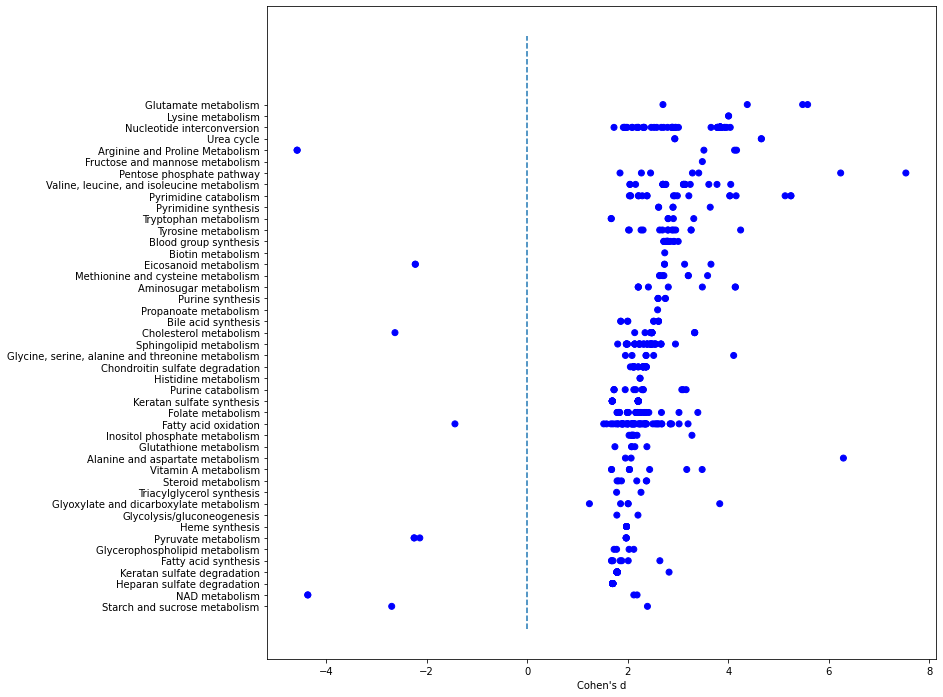

In [312]:
# only significant
data = W[~W['subsystem'].isin(["Miscellaneous", "Unassigned"])]
data = data[~data['subsystem'].map(lambda x: "Transport" in x or "Exchange" in x or x == "Other")]
items, counts = np.unique(data['subsystem'], return_counts=True)
items = [items[i] for i in range(len(items)) if counts[i] > 5] #filter(n() > 5) %>%
data = data[data['subsystem'].isin(items)]
data = data[data['adjusted_pval'] < 0.05]
plt.figure(figsize=(12,12))
axs = plt.gca()
#Sorts the reactions for plotting
d = data[data['adjusted_pval'] < 0.05].groupby('subsystem')['cohens_d'].median().abs()
axs.scatter(d[d.argsort], d[d.argsort].index, alpha=0)
#color = data['cohens_d'].map(lambda x: 'r' if x >= 0 else 'b')
alpha = data['adjusted_pval'].map(lambda x: 1.0 if x < 0.1 else 0.25)
axs.scatter(data['cohens_d'], data['subsystem'], c=color, alpha=alpha)
axs.set_xlabel("Cohen's d")
axs.vlines(x=0, ymin=-2, ymax=50, linestyles='--')

In [27]:
import matplotlib.pyplot as plt
import matplotlib
def plot_differential_scores(data, title, c):
    plt.figure(figsize=(10,10))
    axs = plt.gca()
    axs.scatter(data['cohens_d'], -np.log10(data['adjusted_pval']), c=c)
    axs.set_xlabel("Cohen's d", fontsize=16)
    axs.set_ylabel("-log10 (Wilcoxon-adjusted p)", fontsize=16)
    #Everything after this should be tweaked depending on your application
    axs.set_xlim(-6.2, 6.2)
    axs.axvline(0, dashes=(3,3), c='black')
    axs.axhline(1, dashes=(3,3), c='black')
    axs.set_title(title, fontdict={'fontsize':20})
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(0, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#348C73', linewidth=4))
    axs.annotate('Th17p_V', xy=(0.75, -0.12), xycoords='axes fraction', fontsize=16)
    axs.annotate('', xy=(0.5, -0.08), xycoords='axes fraction', xytext=(1, -0.08),
            arrowprops=dict(arrowstyle="<-", color='#E92E87', linewidth=4))
    axs.annotate('Th17n_V', xy=(0.25, -0.12), xycoords='axes fraction', fontsize=16)
    for r in data.index:
        if r in labeled_reactions:
            x = data.loc[r, 'cohens_d']
            y = -np.log10(data.loc[r, 'adjusted_pval'])
            offset = (20, 0)
            if x < 0:
                offset = (-100, -40)
            axs.annotate(labeled_reactions[r], (x,y), xytext = offset,
                         textcoords='offset pixels', arrowprops={'arrowstyle':"-"})

In [28]:
filtered_data = pd.concat([W[W['subsystem'] == "Nucleotide interconversion"],
                           W[W['subsystem'] == "Fatty acid oxidation"],
                           W[W['subsystem'] == "Keratan sulfate synthesis"],
                           W[W['subsystem'] == "Keratan sulfate degradation"],
                          ])

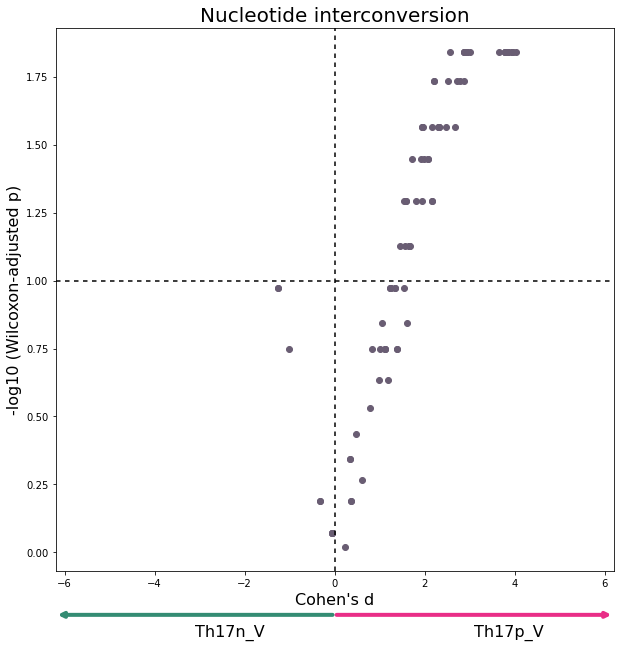

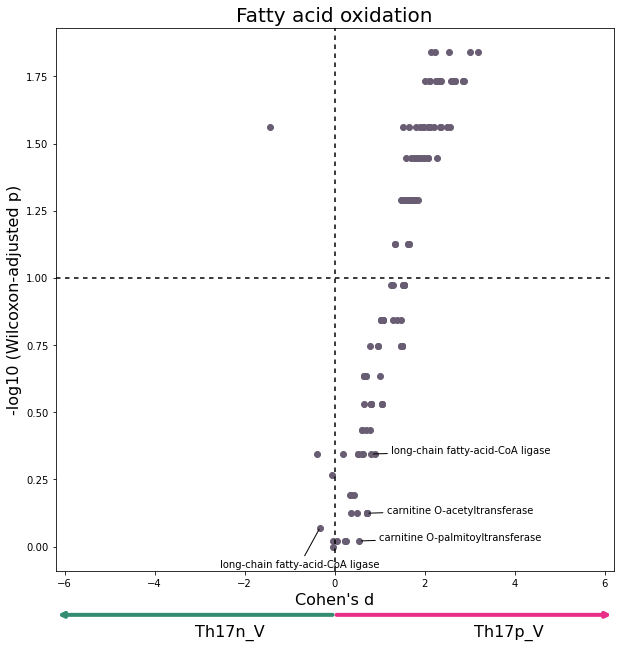

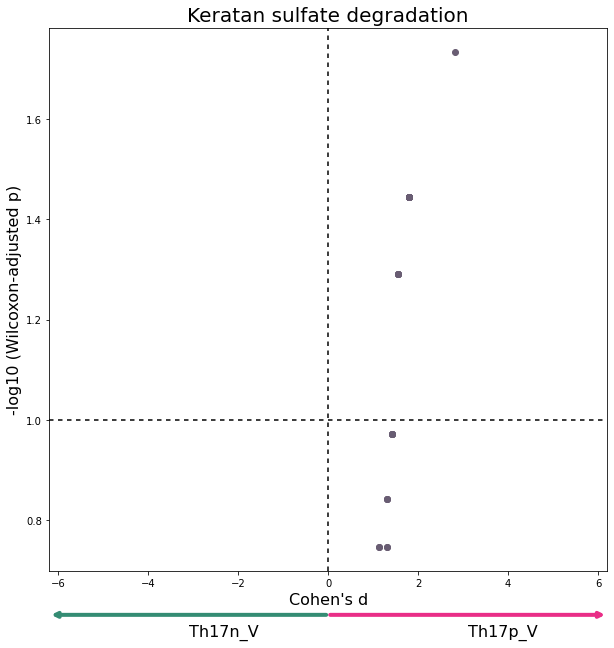

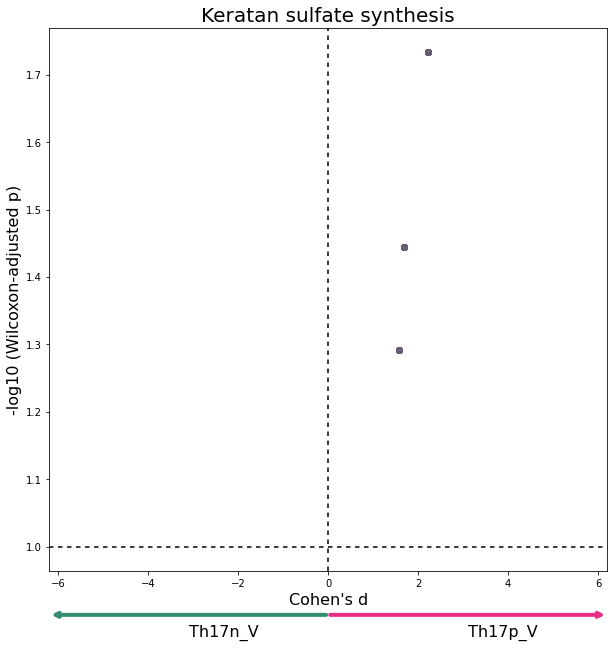

In [29]:
for item in filtered_data['subsystem'].value_counts().keys():
    data = W[W['subsystem'] == item]
    plot_differential_scores(data, title=item, c="#695D73")

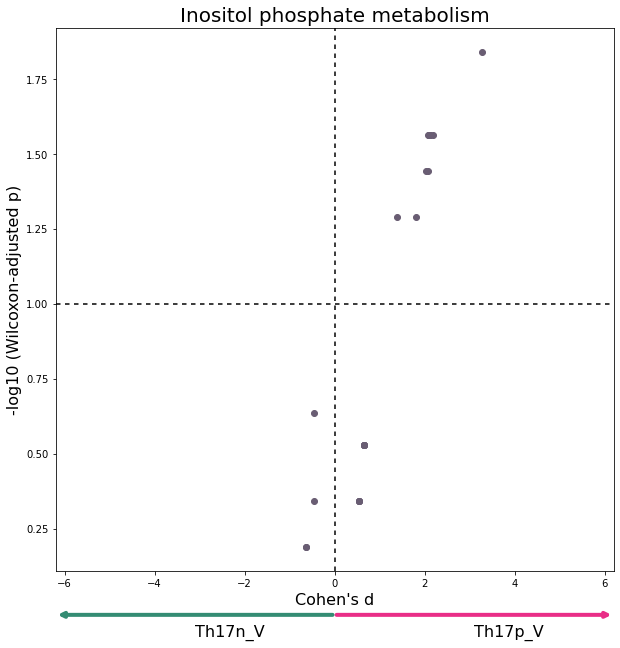

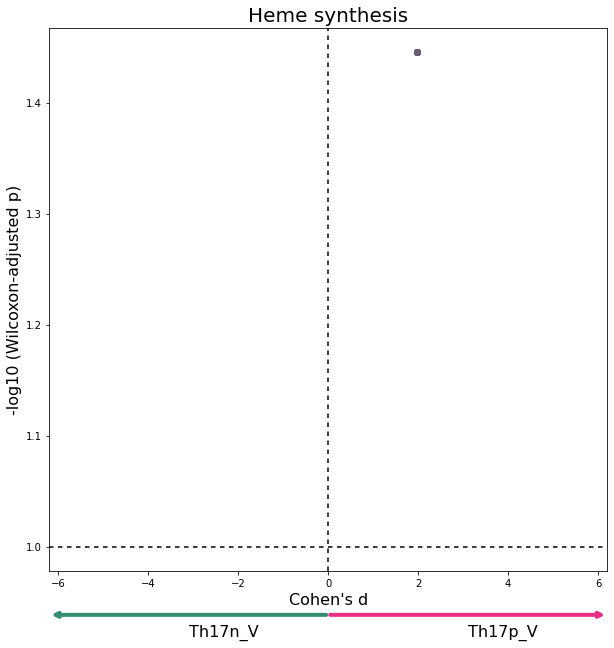

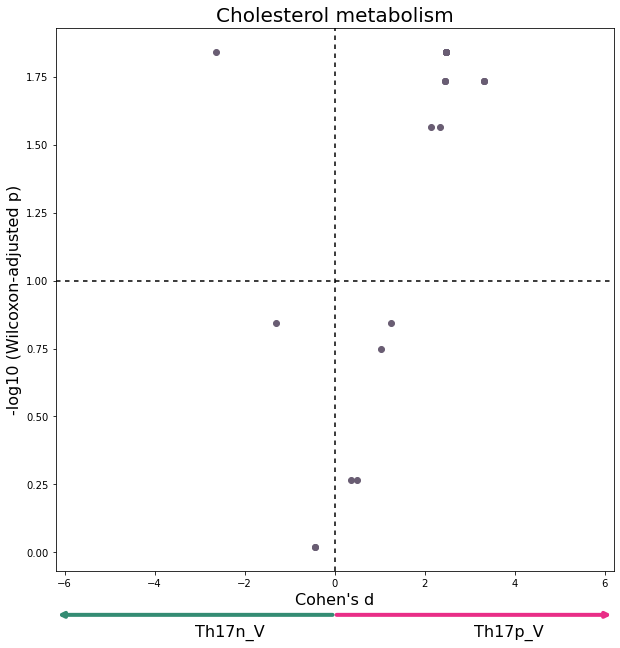

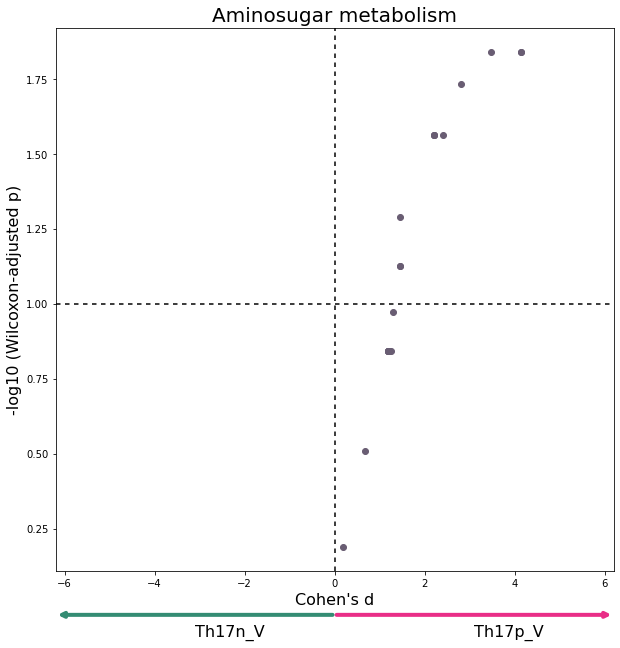

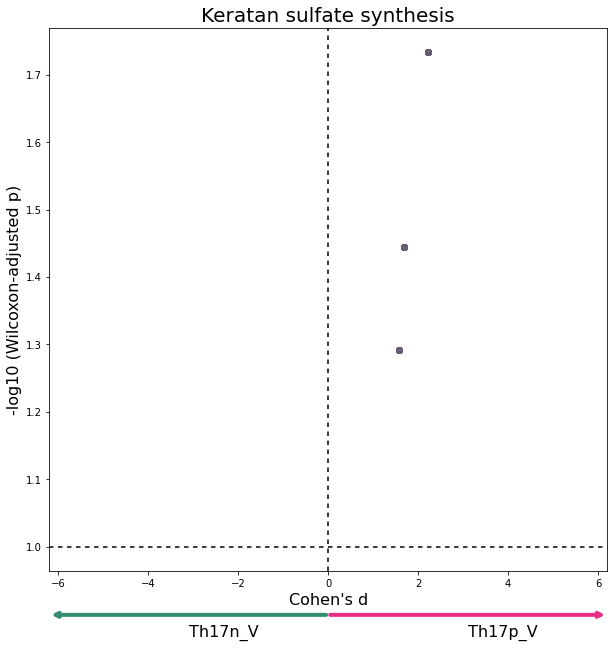

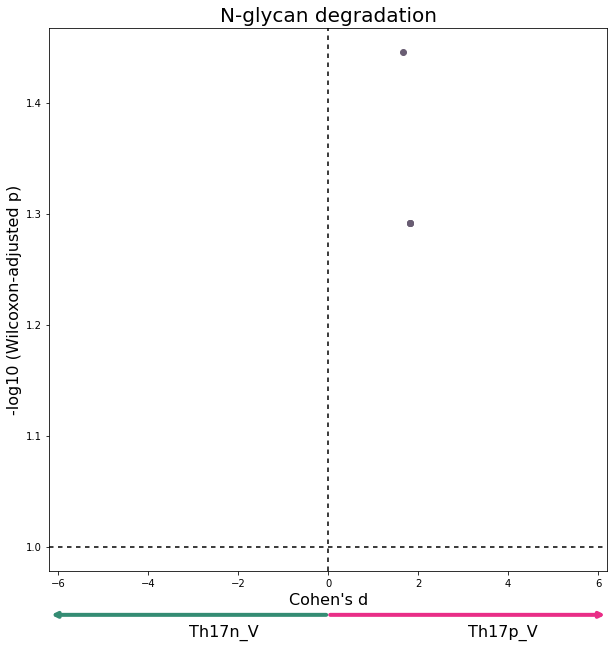

In [30]:
keys = ["Inositol phosphate metabolism", "Heme synthesis", "Cholesterol metabolism", 
        "Aminosugar metabolism", "Keratan sulfate synthesis", "N-glycan degradation"]
for item in keys:
    data = W[W['subsystem'] == item]
    plot_differential_scores(data, title=item, c="#695D73")